<h1><center> Using Statistics to Identify Spam </center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Question


You have the option to choose one (and only one) of the following problems from the back of chapter 3 (<a href="http://rdatasciencecases.org/">http://rdatasciencecases.org/</a>): 19, 20, or 21 instead of the case study mentioned at the end of module 6.8.

- Q.19 Consider the other parameters that can be used to control the recursive partitioning
    process. Read the documentation for them in the rpart.control() documentation. Also,
    carry out an Internet search for more information on how to tweak the rpart() tuning
    parameters. Experiment with values for these parameters. Do the trees that result make
    sense with your understanding of how the parameters are used? Can you improve the
    prediction using them?

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract


[Back to Contents](#Contents)

# Introduction





[Back to Contents](#Contents)

# Background



[Back to Contents](#Contents)

# Methods



[Back to Contents](#Contents)

# Results


[Back to Contents](#Contents)

# Conclusion

[Back to Contents](#Contents)

# References


[Back to Contents](#Contents)


# Appendix

[Back to Contents](#Contents)

## Code 

In [1]:
# install.packages("tm", dependencies=TRUE, repos='http://cran.rstudio.com/')
# above may not working very well, you can use conda to install in your jupyter environment.
# conda install r-tm
#install.packages("rpart", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("rpart.plot", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("MLmetrics", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("naivebayes", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("xgboost", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("R.utils", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("readtext", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("filesstrings", dependencies=TRUE, repos='http://cran.rstudio.com/')

In [2]:
# import libraries

library(NLP)
library(tm)
library(RColorBrewer)
library(rpart)
library(rpart.plot)
library(RColorBrewer)
library(caret)
library(MLmetrics)
library(naivebayes)
library(e1071)
library(randomForest)
library(xgboost)
library(R.utils)
library(readtext)
library(filesstrings)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall

naivebayes 0.9.6 loaded
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
R.oo v1.22.0 (2018-04-21) successfully loaded. See ?R.oo for help.

Attachin

## Download Data from website

In [3]:
# web site to download the spam messages
url = 'https://spamassassin.apache.org/old/publiccorpus/'
# spam path to save the files
spamPath = "./SpamAssassinMessages/"

In [4]:
# get the zip file list
files = c('20030228_easy_ham.tar.bz2','20030228_hard_ham.tar.bz2','20030228_easy_ham_2.tar.bz2'
          ,'20030228_spam.tar.bz2','20050311_spam_2.tar.bz2'
          # t match with the book
         ,'20021010_easy_ham.tar.bz2','20021010_hard_ham.tar.bz2','20021010_spam.tar.bz2','20030228_spam_2.tar.bz2'
         )
for (file in files){    
    inputfile = paste(url,file,sep = "")
    outputfile = paste(spamPath,file,sep = "")
    print(inputfile)
    download.file(inputfile,outputfile)
}
# unzip the zip files to tar
for (file in files){
    inputfile = paste(spamPath,file,sep = "")
    outputfile = gsub(".bz2", "", file)
    outputfile = paste(spamPath,outputfile,sep = "")
    print(outputfile)
    bunzip2(inputfile, outputfile, remove = FALSE, skip = TRUE)
    }
# unzip tar files to folders
for (file in files){
    inputfile = gsub(".bz2", "", file)
    inputfile = paste(spamPath,inputfile,sep = "")
    ouputfolder = paste(spamPath,"messages",sep = "")
    print(ouputfolder)
    untar(inputfile, list=FALSE,exdir = ouputfolder) 
    }

[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_spam_2.tar.bz2"
[1] "./SpamAssassinMessages/20030228_easy_ham.tar"
[1] "./SpamAssassinMessages/20030228_hard_ham.tar"
[1] "./SpamAssassinMessages/20030228_easy_ham_2.tar"
[1] "./SpamAssassinMessages/20030228_spam.tar"
[1] "./SpamAssassinMessages/20050311_spam_2.tar"
[1] "./SpamAssassinMessages/20

In [5]:
# remove a file which is not email format
file.remove(paste(spamPath,"/messages/spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1",sep = ""))

[1] TRUE

In [6]:
#fix the files have no \n in the last row

fixfiles = c("messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493"
             ,"messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072"
            ,"messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072"
            ,"messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0"
             ,"messages/spam/0143.260a940290dcb61f9327b224a368d4af"
            )
for (file in fixfiles){
    inputfile = paste(spamPath,file,sep = "")
    #print(inputfile)
    x = readtext(file=inputfile)
    fileDesc = gsub("messages/hard_ham/", "", file)
    fileDesc = gsub("messages/spam/", "", fileDesc)
    #print (fileDesc)
    f <- file(fileDesc, open="wb")
    write.table(x["text"],file<-f,row.names=FALSE, col.names=FALSE,eol="\n",sep="",quote=FALSE)
    close(f)
    targetfile=gsub(fileDesc, "", inputfile)
    file.move(fileDesc,targetfile,overwrite = TRUE)
}

Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '0eaef7857bbbf3ebf5edbbdae2b30493' of file ./SpamAssassinMessages/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '7c6cc716ce3f3bfad7130dd3c8d7b072' of file ./SpamAssassinMessages/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '7c6cc716ce3f3bfad7130dd3c8d7b072' of file ./SpamAssassinMessages/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension 'faa39d8e816c70f23b4bb8758d8a74f0

## Import the files into data frame

In [7]:

#spamPath = system.file(package = "RSpamData")
#spamPath = "/Users/nolan/RPackages/RSpamData"spamPath = "."
spamPath = "./SpamAssassinMessages/"
list.dirs(spamPath, full.names = FALSE)



[1] ""                    "messages"            "messages/easy_ham"  
[4] "messages/easy_ham_2" "messages/hard_ham"   "messages/spam"      
[7] "messages/spam_2"

In [8]:
list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))



[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [9]:
list.files(path = paste(spamPath,'spam', sep=.Platform$file.sep))

character(0)

In [10]:
head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

./SpamAssassinMessages//messages/easy_ham 
                                       5052 
./SpamAssassinMessages//messages/easy_ham_2 
                                       1401 
  ./SpamAssassinMessages//messages/hard_ham 
                                        501 
      ./SpamAssassinMessages//messages/spam 
                                       1001 
    ./SpamAssassinMessages//messages/spam_2 
                                       1398

In [11]:
fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

msg = sampleEmail[[1]]
which(msg == "")[1]

match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

[1] "./SpamAssassinMessages//messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"     
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"         
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                      
[4] "Received: from localhost (localhost [127.0.0.1])"                 
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

[1] 63

[1] 63

[1] "List-Archive: <https://listman.spamassassin.taint.org/mailman/private/exmh-workers/>"
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                               
[3] ""                                                                                    
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                    
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"         
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                         
[7] ""                                                                                    
[8] ""                                                                                    
[9] "  | I can't reproduce this error."

In [12]:
# function to split the email messages

splitMessage = function(msg) {
    
    splitPoint = match("", msg)
    #print(splitPoint)
#     if(is.na(splitPoint)!=TRUE){
         header = msg[1:(splitPoint)-1]
         body = msg[ -(1:splitPoint) ]        
#     }
      
#     else {   
#         print(msg)
#         header = ""
#         body = "" 
#     }
   
  return(list(header = header, body = body))
}


In [13]:
sampleSplit = lapply(sampleEmail, splitMessage)

In [14]:
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")


[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

In [15]:


sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach


./SpamAssassinMessages//messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                                              46 
./SpamAssassinMessages//messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                                              45 
./SpamAssassinMessages//messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                                              42 
./SpamAssassinMessages//messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                                              30 
./SpamAssassinMessages//messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                                              44 
./SpamAssassinMessages//messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                                              54 
./SpamAssassinMessages//messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                                              NA 
./SpamAssassinMessages//messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                                              21 
./SpamAssassinMessages//messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                                              17 
 ./SpamAssassinMessages//messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                                              52 
./SpamAssassinMessages//messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                                              31 
./SpamAssassinMessages//messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                                              52 
 ./SpamAssassinMessages//messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                                              52 
./SpamAssassinMessages//messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                                              27 
./SpamAssassinMessages//messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                                              31

./SpamAssassinMessages//messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                                           FALSE 
./SpamAssassinMessages//messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                                            TRUE 
 ./SpamAssassinMessages//messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                                            TRUE 
 ./SpamAssassinMessages//messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                                            TRUE 
./SpamAssassinMessages//messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                                            TRUE

In [16]:
header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

[1] "    boundary=\"==_Exmh_-1317289252P\";"

[1] "==_Exmh_-1317289252P"

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

In [17]:
sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

[1] "Apple-Mail-2-874629474"

[1] "==_Exmh_-1317289252P;"

[1] "==_Exmh_-1317289252P"

[1] "--==_Exmh_-1317289252P"                                                           
 [2] "Content-Type: text/plain; charset=us-ascii"                                       
 [3] ""                                                                                 
 [4] "> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                                 
 [5] "> Date:  Wed, 21 Aug 2002 10:40:39 -0500"                                         
 [6] ">"                                                                                
 [7] "> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                               
 [8] "> > Date:  Wed, 21 Aug 2002 10:17:45 -0500"                                       
 [9] "> >"                                                                              
[10] "> > Ouch...I'll get right on it."                                                 
[11] "> > "                                                                             
[12] "> > > From:  Robert Elz <kre@munnari.OZ.AU>"                                      
[13] "> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700"                                     
[14] "> > >"                                                                            
[15] "> > > Any chance of having that lengthen instead?   I like all my exmh stuff"     
[16] "> > > in nice columns (fits the display better).   That is, I use the detache"    
[17] "> d"                                                                              
[18] "> > > folder list, one column.   The main exmh window takes up full screen,"      
[19] "> > > top to bottom, but less than half the width, etc..."                        
[20] "> "                                                                               
[21] "> I thought about that.  The first order approximation would be to just add "     
[22] "> using pack .... -side top instead of pack ... -side left, however, since their "
[23] "> each a different width, it would look funny."                                   
[24] ""                                                                                 
[25] "I've done this.  It's not as pretty as I think it should be, but it works.  "     
[26] "I'm going to leave the cosmetic issues to others.  When I update the "            
[27] "documentation, I'll add this to the exmh.TODO file."                              
[28] ""                                                                                 
[29] "I'm leaving for a 2 1/2 week vacation in a week, so this is the last new "        
[30] "functionality I'm going to add for a while.  Also, I now have pretty much "       
[31] "everything in there that I want for my own use, so I'm probably pretty much "     
[32] "done.  I'll work on bug fixes and documentation before my vacation, and "         
[33] "hopefully do nothing more afterwards."                                            
[34] ""                                                                                 
[35] "Chris"                                                                            
[36] ""                                                                                 
[37] "-- "                                                                              
[38] "Chris Garrigues                 http://www.DeepEddy.Com/~cwg/"                    
[39] "virCIO                          http://www.virCIO.Com"                            
[40] "716 Congress, Suite 200"                                                          
[41] "Austin, TX  78701\t\t+1 512 374 0500"                                               
[42] ""                                                                                 
[43] "  World War III:  The Wrong-Doers Vs. the Evil-Doers."                            
[44] ""                                                                                 
[45] ""                                                                            

In [18]:


boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

[1]  2 35

[1] 77

[1] ">"     ">Yuck" ">  "   ">"     ""      ""

[1] ">  " ">"   ""    ""    ""    ""

In [19]:
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

In [20]:
head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

In [21]:

stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

In [22]:
words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

In [23]:
cleanText = function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

In [24]:

processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}


In [25]:
msgWordsList = lapply(fullDirNames, processAllWords, stopWords = stopWords) 

In [26]:
numMsgs = sapply(msgWordsList, length)
numMsgs

[1] 5051 1400  500 1000 1397

In [27]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 80050

In [28]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [29]:
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


[1] 15.02406

[1] -161.6614

$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1076.8  -137.2  -108.3  -125.6   -88.6   753.5 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -85.759   -7.506   36.431   84.980  111.270 1457.719 


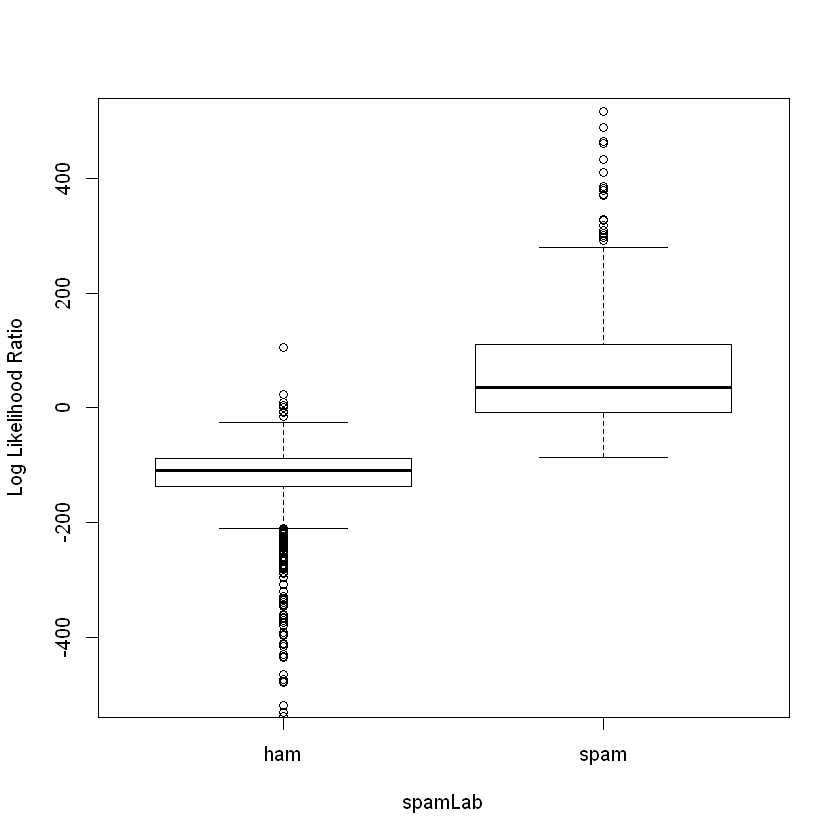

In [30]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


In [31]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.003884333

[1] 0.006042296

In [32]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

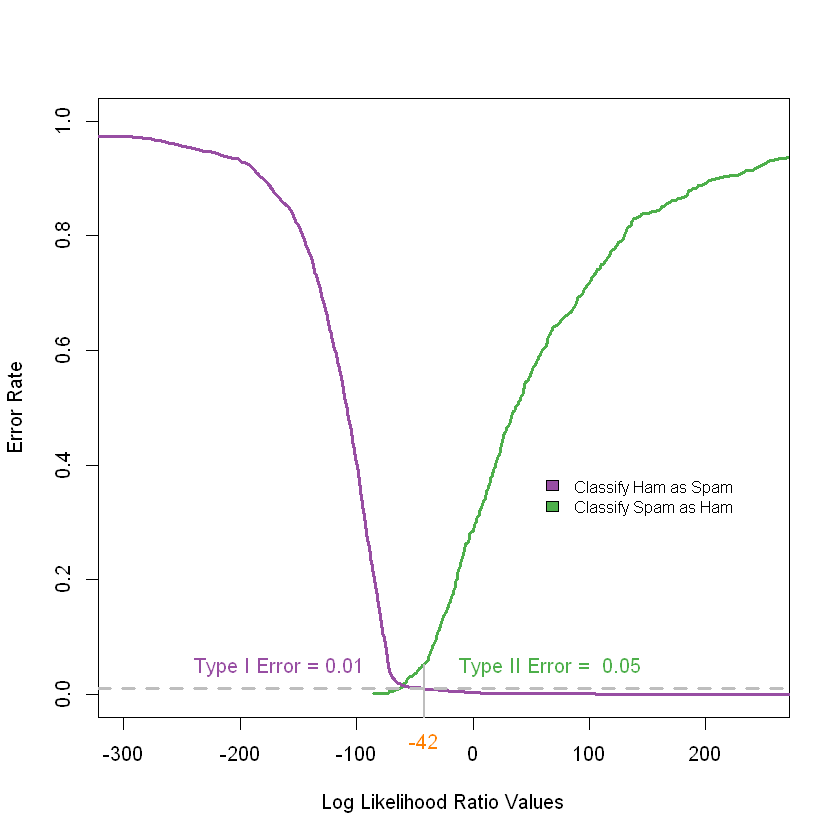

In [33]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

#library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

In [34]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [35]:
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] 1.8189894035458565e-06
[1] 10000.000001818989
[1] 10000


[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                 
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                      
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                         
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                          
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [36]:
headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

[1] 36

[1] 26

In [37]:
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

[1]  6  8  9 10 11 12 13 14 15

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

[1]  2 35

[1] 77

[1] 42

In [38]:
### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


In [39]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

$`./SpamAssassinMessages//messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`./SpamAssassinMessages//messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`./SpamAssassinMessages//messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`./SpamAssassinMessages//messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`./SpamAssassinMessages//messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`./SpamAssassinMessages//messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 12

aLen,aType
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


[1] 86

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                       
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

In [40]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [41]:
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [42]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [43]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [44]:
sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

./SpamAssassinMessages//messages/easy_ham1 
                                    4.451039 
  ./SpamAssassinMessages//messages/easy_ham2 
                                    7.491289 
  ./SpamAssassinMessages//messages/easy_ham3 
                                    7.436096 
  ./SpamAssassinMessages//messages/easy_ham4 
                                    5.090909 
  ./SpamAssassinMessages//messages/easy_ham5 
                                    6.116643 
 ./SpamAssassinMessages//messages/easy_ham15 
                                    7.732865 
 ./SpamAssassinMessages//messages/easy_ham27 
                                    5.523256 
 ./SpamAssassinMessages//messages/easy_ham68 
                                   10.059172 
 ./SpamAssassinMessages//messages/easy_ham69 
                                   10.885806 
./SpamAssassinMessages//messages/easy_ham329 
                                    6.472492 
./SpamAssassinMessages//messages/easy_ham404 
                                    9.597258 
./SpamAssassinMessages//messages/easy_ham427 
                                   11.970075 
./SpamAssassinMessages//messages/easy_ham516 
                                    9.233792 
./SpamAssassinMessages//messages/easy_ham852 
                                    1.655629 
./SpamAssassinMessages//messages/easy_ham971 
                                    6.417910

In [45]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

$isRe
  ./SpamAssassinMessages//messages/easy_ham1 
                                        TRUE 
  ./SpamAssassinMessages//messages/easy_ham2 
                                       FALSE 
  ./SpamAssassinMessages//messages/easy_ham3 
                                       FALSE 
  ./SpamAssassinMessages//messages/easy_ham4 
                                       FALSE 
  ./SpamAssassinMessages//messages/easy_ham5 
                                        TRUE 
 ./SpamAssassinMessages//messages/easy_ham15 
                                        TRUE 
 ./SpamAssassinMessages//messages/easy_ham27 
                                        TRUE 
 ./SpamAssassinMessages//messages/easy_ham68 
                                       FALSE 
 ./SpamAssassinMessages//messages/easy_ham69 
                                        TRUE 
./SpamAssassinMessages//messages/easy_ham329 
                                        TRUE 
./SpamAssassinMessages//messages/easy_ham404 
                                        TRUE 
./SpamAssassinMessages//messages/easy_ham427 
                                        TRUE 
./SpamAssassinMessages//messages/easy_ham516 
                                        TRUE 
./SpamAssassinMessages//messages/easy_ham852 
                                       FALSE 
./SpamAssassinMessages//messages/easy_ham971 
                                        TRUE 

$numLines
  ./SpamAssassinMessages//messages/easy_ham1 
                                          50 
  ./SpamAssassinMessages//messages/easy_ham2 
                                          26 
  ./SpamAssassinMessages//messages/easy_ham3 
                                          38 
  ./SpamAssassinMessages//messages/easy_ham4 
                                          32 
  ./SpamAssassinMessages//messages/easy_ham5 
                                          31 
 ./SpamAssassinMessages//messages/easy_ham15 
                                          54 
 ./SpamAssassinMessages//messages/easy_ham27 
                                          35 
 ./SpamAssassinMessages//messages/easy_ham68 
                                          36 
 ./SpamAssassinMessages//messages/easy_ham69 
                                          65 
./SpamAssassinMessages//messages/easy_ham329 
                                          58 
./SpamAssassinMessages//messages/easy_ham404 
                                          70 
./SpamAssassinMessages//messages/easy_ham427 
                                          31 
./SpamAssassinMessages//messages/easy_ham516 
                                          38 
./SpamAssassinMessages//messages/easy_ham852 
                                          28 
./SpamAssassinMessages//messages/easy_ham971 
                                          34 

$isYelling
  ./SpamAssassinMessages//messages/easy_ham1.Subject 
                                               FALSE 
  ./SpamAssassinMessages//messages/easy_ham2.Subject 
                                               FALSE 
  ./SpamAssassinMessages//messages/easy_ham3.Subject 
                                               FALSE 
  ./SpamAssassinMessages//messages/easy_ham4.Subject 
                                               FALSE 
  ./SpamAssassinMessages//messages/easy_ham5.Subject 
                                               FALSE 
 ./SpamAssassinMessages//messages/easy_ham15.Subject 
                                               FALSE 
 ./SpamAssassinMessages//messages/easy_ham27.Subject 
                                               FALSE 
 ./SpamAssassinMessages//messages/easy_ham68.Subject 
                                               FALSE 
 ./SpamAssassinMessages//messages/easy_ham69.Subject 
                                               FALSE 
./SpamAssassinMessages//messages/easy_ham329.Subject 
                                               FALSE 
./SpamAssassinMessages//messages/easy_ham404.Subject 
                                               FALSE 
./SpamAssassinMessages/

,isRe,numLines,isYelling,perCaps
./SpamAssassinMessages//messages/easy_ham1,TRUE,50,FALSE,4.451039
./SpamAssassinMessages//messages/easy_ham2,FALSE,26,FALSE,7.491289
./SpamAssassinMessages//messages/easy_ham3,FALSE,38,FALSE,7.436096
./SpamAssassinMessages//messages/easy_ham4,FALSE,32,FALSE,5.090909
./SpamAssassinMessages//messages/easy_ham5,TRUE,31,FALSE,6.116643
./SpamAssassinMessages//messages/easy_ham15,TRUE,54,FALSE,7.732865


In [46]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [47]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [48]:
#load("Data/spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


[1] 9348   30

In [49]:
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

[1] TRUE

Warning message in indNA == indNoSubject:
"longer object length is not a multiple of shorter object length"

[1] FALSE

[1] TRUE

null device 
          1

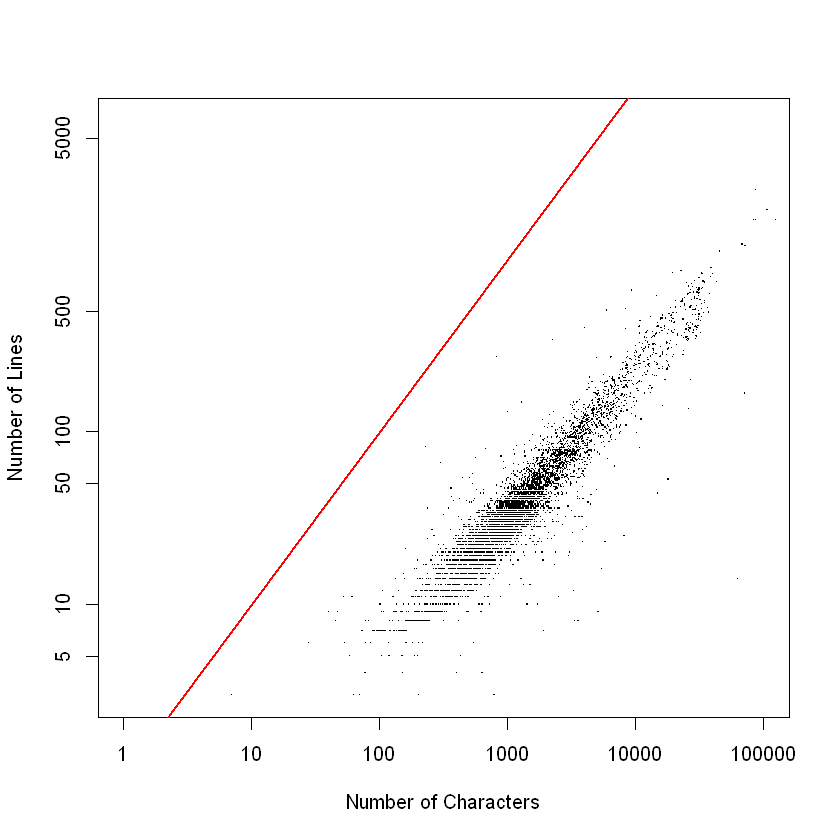

In [50]:
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()

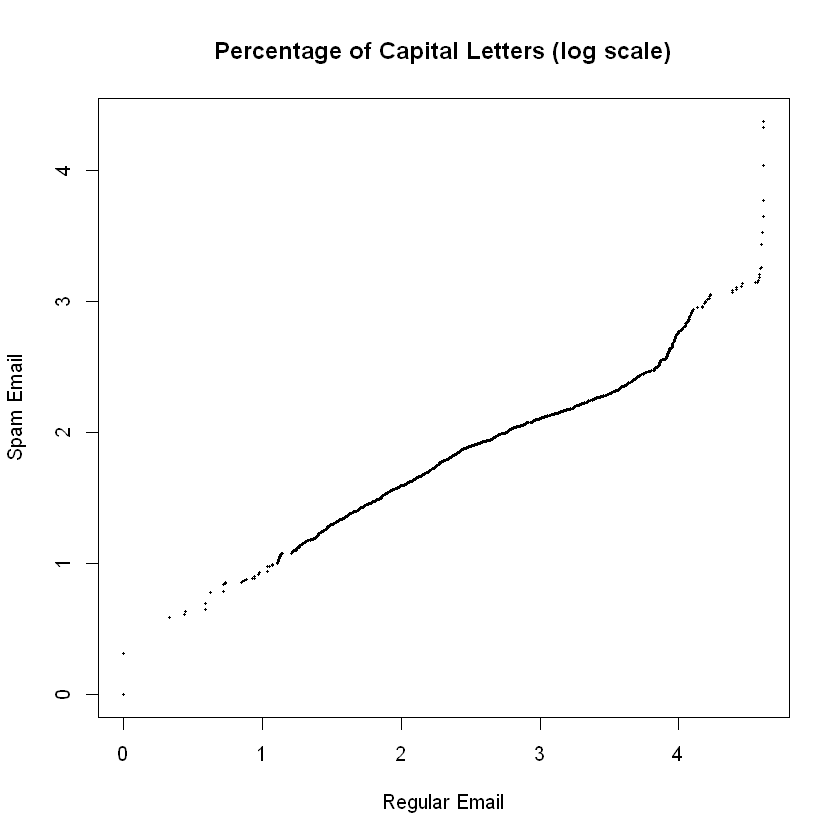

In [51]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

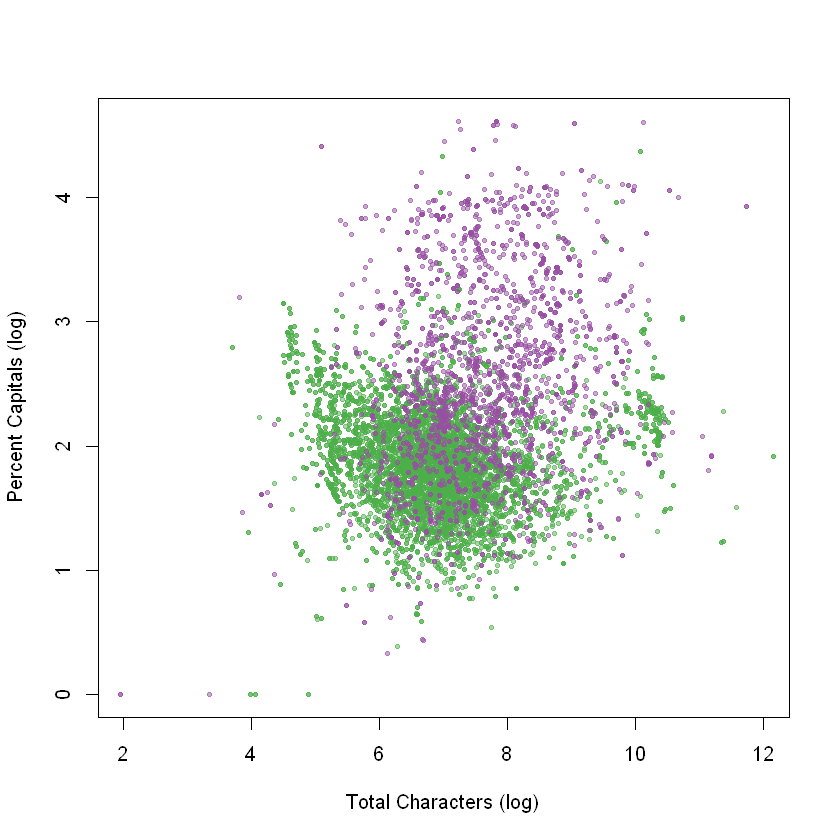

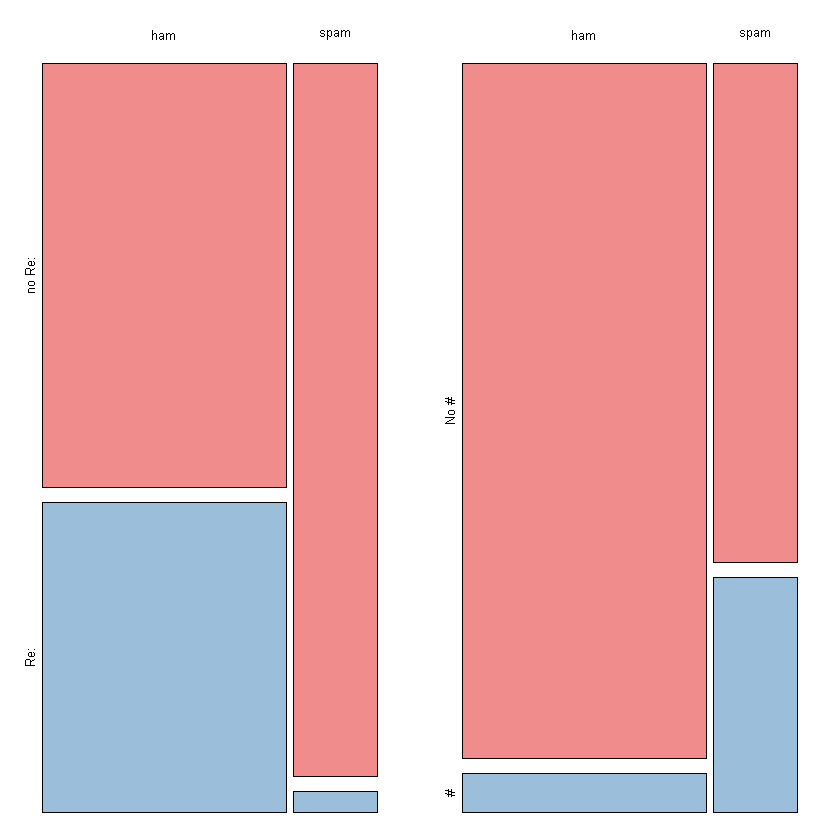

In [52]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()



setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [53]:


set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")


F    T 
2167  150

[1] 0.06473889

[1] 0.1864831

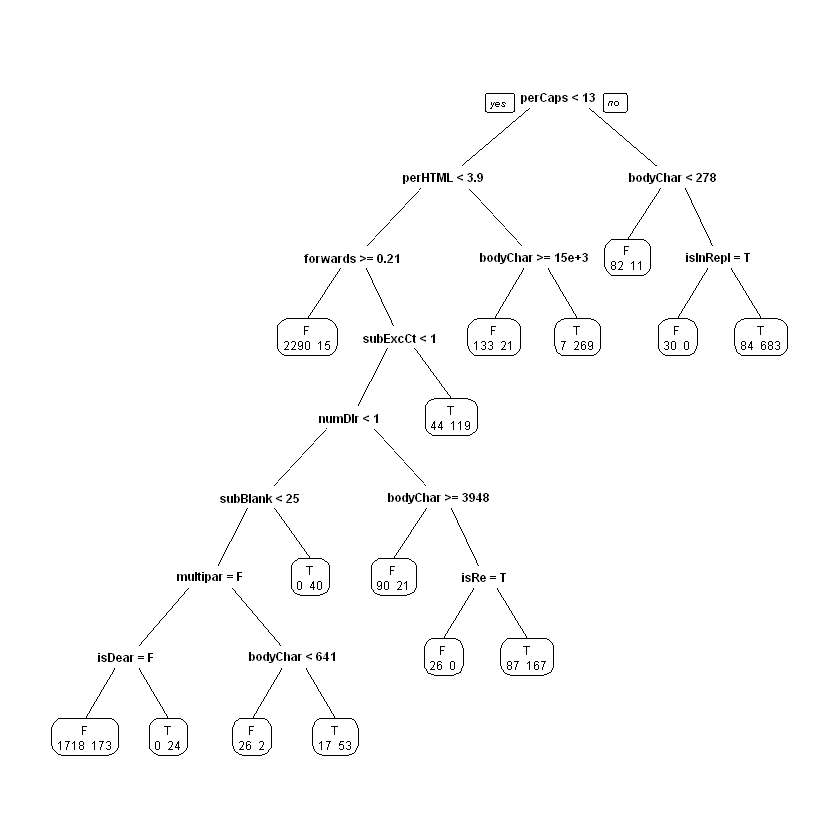

In [54]:



prp(rpartFit, extra = 1)

#library(rpart)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

In [55]:
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })


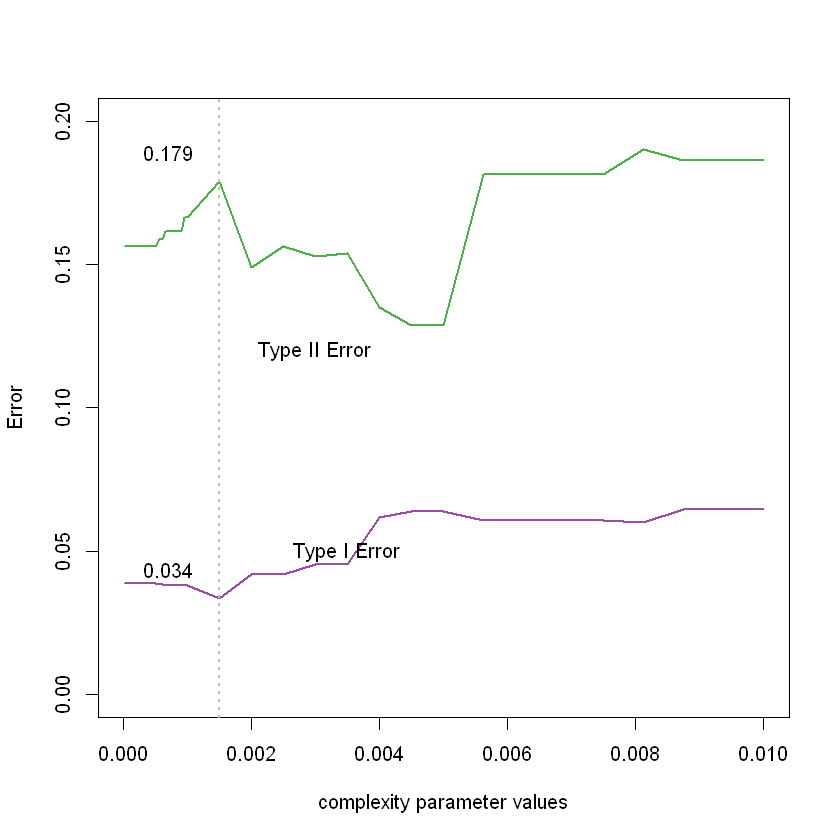

In [56]:

#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
#library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

In [57]:
save(emailDFrp,file="data.Rda")

In [58]:
#library(caret)

## Ok so first of all our data is in T/F 'factors'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

In [59]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## I think i may skip this and see if I can get the folds to work internally to caret
However, one way to define your folds is to set a seed, and have your folds in a list that you can pass on to others to get the same splits.

In [60]:

cv_folds <- createFolds(emailDFnum$isSpam, k=5, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

Fold1 Fold2 Fold3 Fold4 Fold5 
 7479  7478  7478  7479  7478

## Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

In [61]:
#library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

In [62]:
#library(naivebayes)
#library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."Warning message:
"model fit failed for Fold1: laplace=0.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.1, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.3, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.5, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=1.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold2: laplace=0.0, use

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  F1         prec       rec        Type_I_err
  0.0      FALSE      FALSE   0.9246638  0.9391819  0.9106603  0.04385965
  0.0      FALSE       TRUE   0.9246638  0.9391819  0.9106603  0.04385965
  0.0       TRUE      FALSE         NaN        NaN        NaN         NaN
  0.0       TRUE       TRUE   0.8928485  0.8080024  0.9979859  0.17693624
  0.1      FALSE      FALSE   0.9246638  0.9391819  0.9106603  0.04385965
  0.1      FALSE       TRUE   0.9246638  0.9391819  0.9106603  0.04385965
  0.1       TRUE      FALSE         NaN        NaN        NaN         NaN
  0.1       TRUE       TRUE   0.8928485  0.8080024  0.9979859  0.17693624
  0.3      FALSE      FALSE   0.9246638  0.9391819  0.9106603  0.04385965
  0.3      FALSE       TRUE   0.9246638  0.93918

In [63]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])


Fold1 Fold2 Fold3 
 3116  3116  3116 

In [64]:
val<-seq(from = 0, to=0.01, by=0.0005)
#library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7479, 7479, 7477, 7478 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9596888  0.9554070  0.9640332  0.03348309  0.02674432 
  0.0005  0.9613245  0.9555690  0.9671986  0.03348338  0.02439069 
  0.0010  0.9624957  0.9558961  0.9692123  0.03326907  0.02289343 
  0.0015  0.9608399  0.9563117  0.9654712  0.03284110  0.02567486 
  0.0020  0.9590725  0.9542425  0.9640324  0.03444572  0.02674507 
  0.0025  0.9575885  0.9537888  0.9614443  0.03465951  0.02866923 
  0.0030  0.9567757  0.9535960  0.9600055  0.03476600  0.02973938 
  0.0035  0.9567782  0.9536058  0.9600055  0.03476583  0.02973938 
  0.0040  0.9543780  0.9503799  0.9584231  0.03722721  0.03091585 
  0.0045  0.9538252  0.9494280  0.9582792  0.03797616  0.03102274 
  0.0050  0.9512657  0.9488234  0.9538188  0.0

In [ ]:
#library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."

In [ ]:
#library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb